<a href="https://colab.research.google.com/github/Suvarna0230/Brain-Tumor-Detection/blob/main/Brain_Tumor_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
import os

zip_path = "/content/archive.zip"
extract_path = "/content/archive"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction done.")


Extraction done.


In [ ]:
import pathlib
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Set the data directories (inside the extracted archive)
data_dir = pathlib.Path("/content/archive")
train_dir = data_dir / "Training"
test_dir = data_dir / "Testing"

# Prepare image generators
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

# Define model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_data.num_classes, activation='softmax')
])

model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
model.fit(train_data, validation_data=test_data, epochs=10)


Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 277s 2s/step - accuracy: 0.5942 - loss: 1.0231 - val_accuracy: 0.8497 - val_loss: 0.4192
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 253s 1s/step - accuracy: 0.8799 - loss: 0.3358 - val_accuracy: 0.8940 - val_loss: 0.2748
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 257s 1s/step - accuracy: 0.9305 - loss: 0.2119 - val_accuracy: 0.9260 - val_loss: 0.2100
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 257s 1s/step - accuracy: 0.9507 - loss: 0.1335 - val_accuracy: 0.9344 - val_loss: 0.1713
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 263s 1s/step - accuracy: 0.9644 - loss: 0.0954 - val_accuracy: 0.9420 - val_loss: 0.2074
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 254s 1s/step - accuracy: 0.9703 - loss: 0.0874 - val_accuracy: 0.9367 - val_loss: 0.1627
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 252s 1s/step - accuracy: 0.9781 - loss: 0.0647 - val_accuracy: 0.9458 - val_loss: 0.1759
Epoch 8/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 265s 1s/step - accuracy: 0.9848 - loss: 0.0471 - val_accu

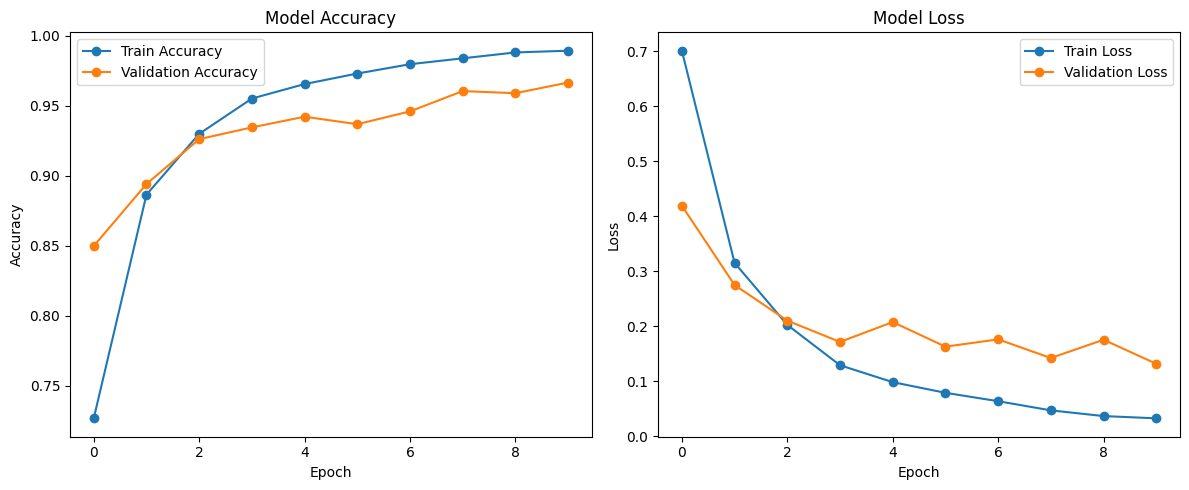

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(model.history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(model.history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(model.history.history['loss'], label='Train Loss', marker='o')
plt.plot(model.history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Get true and predicted labels
Y_true = test_data.classes
Y_pred_probs = model.predict(test_data)
Y_pred = np.argmax(Y_pred_probs, axis=1)

# Class labels
class_labels = list(test_data.class_indices.keys())

# Classification report
print("Classification Report:\n")
print(classification_report(Y_true, Y_pred, target_names=class_labels))

# Confusion matrix
print("Confusion Matrix:\n")
print(confusion_matrix(Y_true, Y_pred))


41/41 ━━━━━━━━━━━━━━━━━━━━ 27s 643ms/step
Classification Report:

              precision    recall  f1-score   support

      glioma       0.22      0.21      0.21       300
  meningioma       0.25      0.25      0.25       306
     notumor       0.31      0.32      0.32       405
   pituitary       0.21      0.21      0.21       300

    accuracy                           0.25      1311
   macro avg       0.25      0.25      0.25      1311
weighted avg       0.25      0.25      0.25      1311

Confusion Matrix:

[[ 62  78  85  75]
 [ 66  78  90  72]
 [ 88  95 129  93]
 [ 65  66 107  62]]


In [ ]:
# Save the model
model.save("/content/brain_tumor_model.h5")
print("Model saved as brain_tumor_model.h5")


Model saved as brain_tumor_model.h5
